In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2025-06-19 15:51:28.791143: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 15:51:29.055107: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-19 15:51:29.246213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750341089.408150     997 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750341089.465220     997 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750341089.834956     997 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #qua prende i dati predefiniti

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)


In [3]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


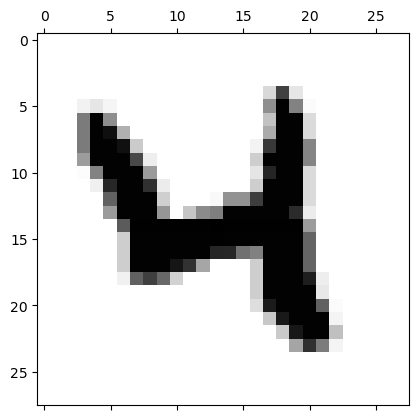

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout

# reshape data, depending on Keras backend
# noi non abbiamo impostato manualmente il data.format, quindi keras fa un check in modo che tutto sia compatibile

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [6]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    # 2nd hidden layer
    model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.summary()

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [7]:
# training parameters
batch_size = 32
epochs = 5 # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/simonelance/miniconda3/envs/laboTF/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 15:51:40.822949: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 20)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,280 (20.62 KB)

 Trainable params: 5,280 (20.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-06-19 15:51:42.240632: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


  13/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - acc: 0.0806 - loss: 2.3236 

2025-06-19 15:51:43.935732: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22592000 exceeds 10% of free system memory.
2025-06-19 15:51:43.937180: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22592000 exceeds 10% of free system memory.
2025-06-19 15:51:43.944772: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22233600 exceeds 10% of free system memory.
2025-06-19 15:51:43.963079: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22592000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - acc: 0.6056 - loss: 1.1691 - val_acc: 0.9534 - val_loss: 0.1706
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.9306 - loss: 0.2282 - val_acc: 0.9662 - val_loss: 0.1110
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.9487 - loss: 0.1660 - val_acc: 0.9741 - val_loss: 0.0866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - acc: 0.9572 - loss: 0.1396 - val_acc: 0.9771 - val_loss: 0.0742
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - acc: 0.9628 - loss: 0.1226 - val_acc: 0.9804 - val_loss: 0.0646
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9764 - loss: 0.0778

Test loss: 0.06461954861879349
Test accuracy: 0.980400025844574


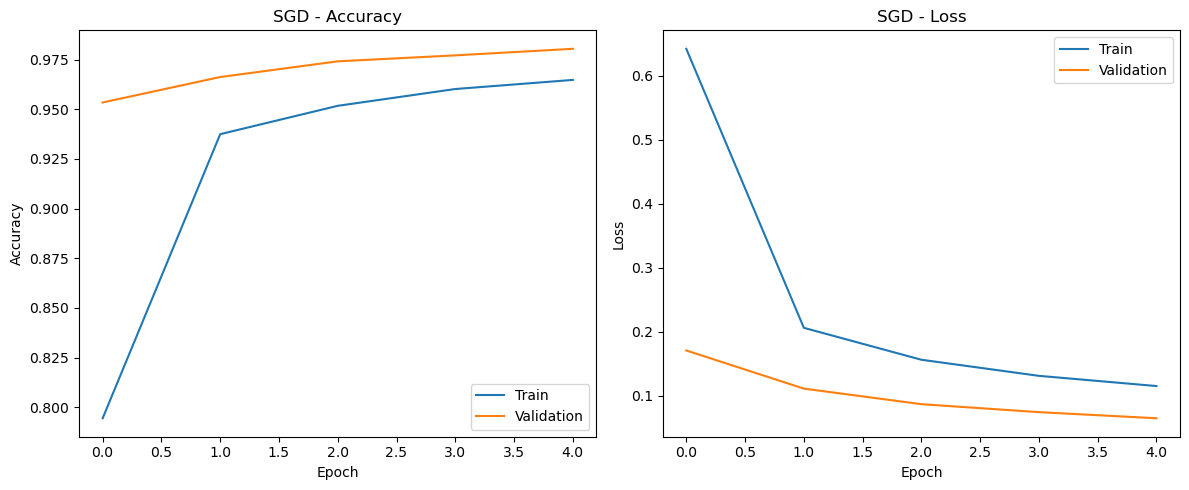

In [8]:
# Crea una figura con 1 riga e 2 colonne di sottotrame
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Accuracy ---
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_title('SGD - Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='best')

# --- Loss ---
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('SGD - Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='best')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


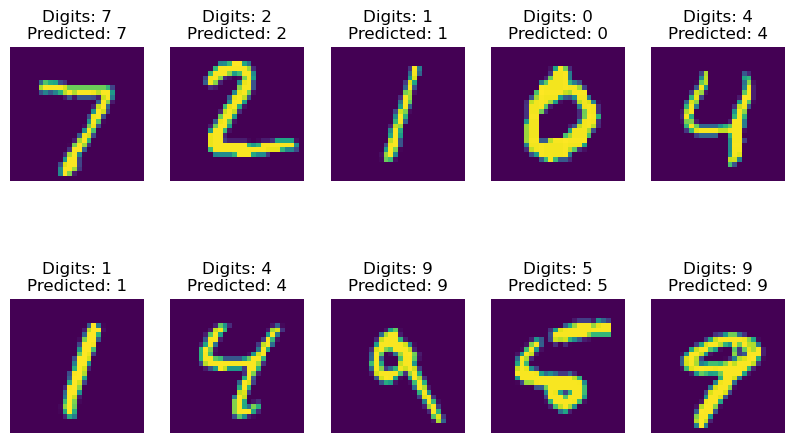

In [9]:
X_test = X_test.reshape( X_test.shape[0], img_rows, img_cols, 1)
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(10,6))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow( X_test[i , :, :, 0])
    plt.title("Digits: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off') 
plt.show()

Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)
Image size: 28x28
(28, 28)


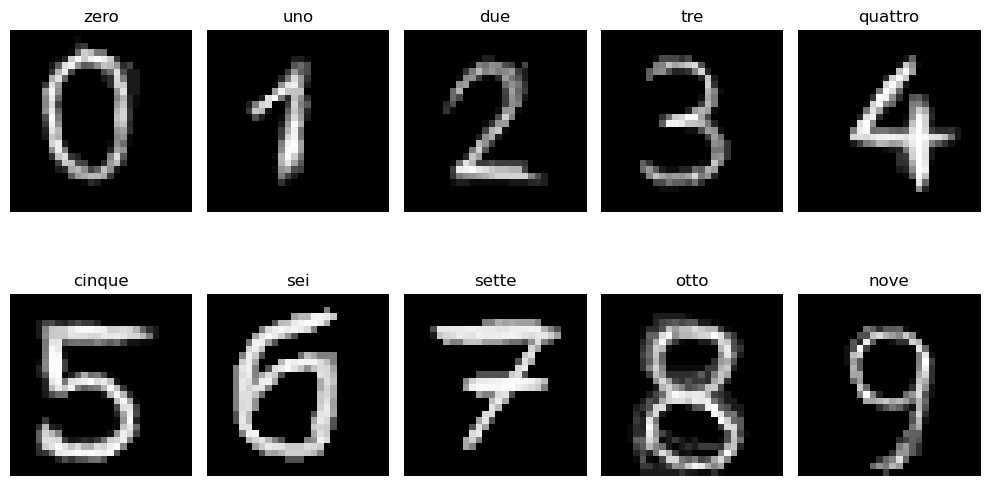

In [29]:
from PIL import Image
import os

folder = "./numeri/"
filenames = ["zero.png", "uno.png", "due.png", "tre.png", "quattro.png", 
             "cinque.png", "sei.png", "sette.png", "otto.png", "nove.png"]


plt.figure(figsize=(10,6))
k=0
data_full = []

for fname in filenames:
    filepath = os.path.join(folder, fname)
    digit_in = Image.open(filepath).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
    
    ydim, xdim = digit_in.size
    
    print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load()
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    
    data /= 255

    data_full.append(data)
    
    ax = plt.subplot(2, 5, k + 1)
    plt.imshow(data, cmap='gray')
    plt.title(filenames[k][:-4])  # Remove .png extension for title
    plt.axis('off')
    print(data.shape)
    k+=1

plt.tight_layout()
plt.show()
    
    
    

(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ -1s -1035951us/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


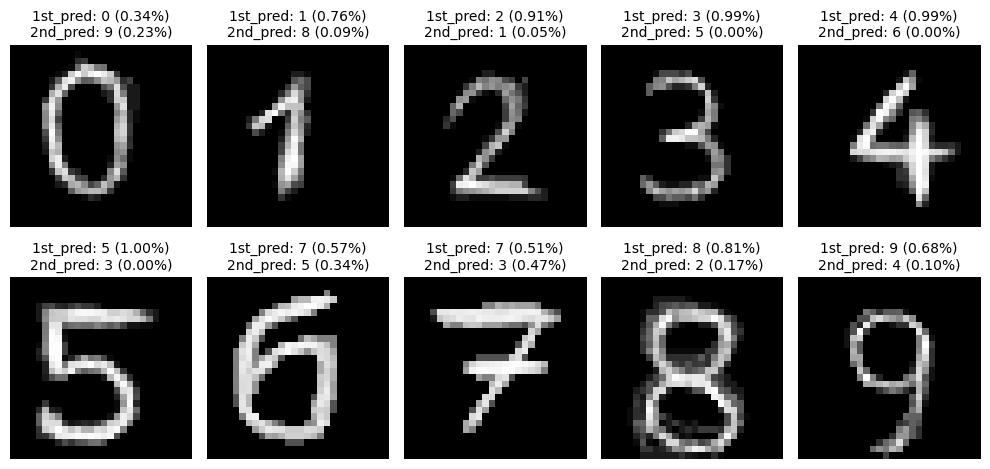

In [37]:
k=0
plt.figure(figsize=(10, 5))  
for fname in filenames:

    print(data_full[k].shape)
    sample = data_full[k].reshape(1, xdim, ydim, 1)
    print(sample.shape)
    
    pred_0 = model_CNN.predict(sample)  # pred_0 ha shape (1, 10)
    pred_values = pred_0[0]             # ottieni l'array di probabilità (shape: (10,))
    
    top_2_indices = pred_values.argsort()[-2:][::-1]
    first_class = top_2_indices[0]
    second_class = top_2_indices[1]
    
    first_prob = pred_values[first_class]
    second_prob = pred_values[second_class]
    
    data = data_full[k].reshape(xdim, ydim)
    
    ax = plt.subplot(2, 5, k + 1)
    plt.imshow(data, cmap='gray')
    plt.title(f"1st_pred: {first_class} ({first_prob:.2f}%)\n2nd_pred: {second_class} ({second_prob:.2f}%)", fontsize=10)
    plt.axis('off')
    
    k += 1

plt.tight_layout()
plt.show()